# Introduction to Python Project : FoodHub Data Analysis

##Problem Statement
The number of restaurants in New York is increasing day by day. Lots of
students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.
The app allows restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin on the delivery order from the restaurants.

##Objectives
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business.

### Data Dictionary

Mention the data dictionary here

### Let us start by importing the required libraries

In [39]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas  as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'DejaVu Sans'

### Understanding the structure of the data

In [1]:
# colab helps to access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading data into a pandas dataframe
path="/content/drive/MyDrive/Great Learning AIML course/Project: Introduction to Python: FoodHub/foodhub_order.csv"
df=pd.read_csv(path)

In [4]:
# View the first and last 5 rows of the dataset
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# checking shape of the data
df.shape

(1898, 9)

#### Observations: The *shape* attribute will help us to get the number of rows and columns of the dataset. There are 1898 rows and 9 columns are there


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
# info() function helps to check the data types of the columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
We can see that the restaurant_name, cuisine_type, day_of_the_week and rating code columns are of object type and cost_of_the_order is float type while  the other columns are of integer type since they are containing numbers.
as seen from the first 5 rows of the dataframe.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
# Cheked the column wise missing values in the dataset using isnull() function
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:  No there are no missing values in the data


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
# Print the common statistical summary manually without using the describe() function Also I use the describe() function in the next sell
print("Minimum time takes for food to be prepared:",df['food_preparation_time'].min())
print("Average time takes for food to be prepared:",df['food_preparation_time'].mean())
print("Maximum time takes for food to be prepared:",df['food_preparation_time'].max())

Minimum time takes for food to be prepared: 20
Average time takes for food to be prepared: 27.371970495258168
Maximum time takes for food to be prepared: 35


In [11]:
# Statistical summary manually without using the describe() function
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
Where food has been prepared in more then 30 minutes and the avg time is more then 25, if food preparation time will reduce then chanses of more order will be increase


### **Question 5:** How many orders are not rated? [1 mark]

In [12]:

not_rated = df['rating'].value_counts() # First I get all the reting by group 'rating'
not_rated[:1] # Then I accesing the first element of the not_rated data list

,count
rating,
Not given,736


#### Observations:
There are 736 orders which dosend't have any rating in the foodhub_order data

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

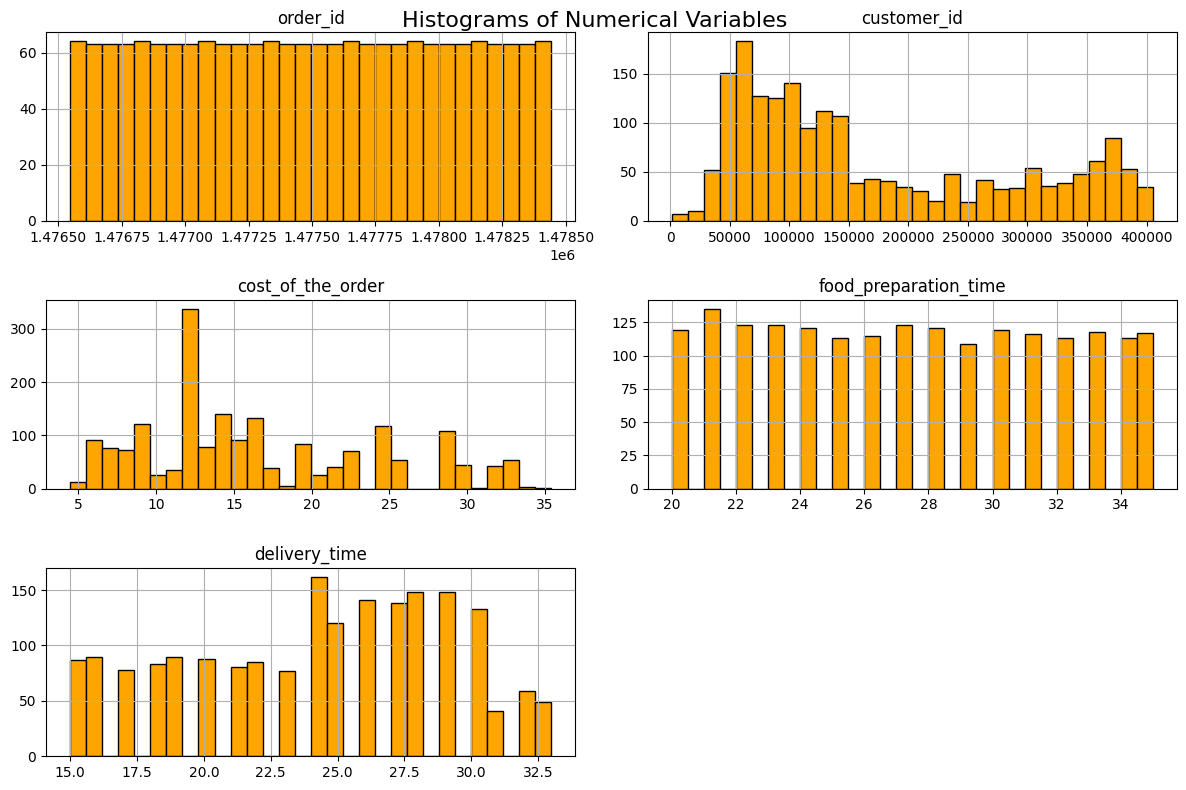

In [13]:
# Plot histograms for all numerical variables
df.hist(figsize=(12, 8), bins=30, edgecolor='black',color='orange') #figsize used to controle the size of the plot and bins used to how many bars we want we can define rest for colors
plt.tight_layout()
plt.suptitle("Histograms of Numerical Variables", fontsize=16) # used to give name for the plot
plt.show() # Here showing the plot



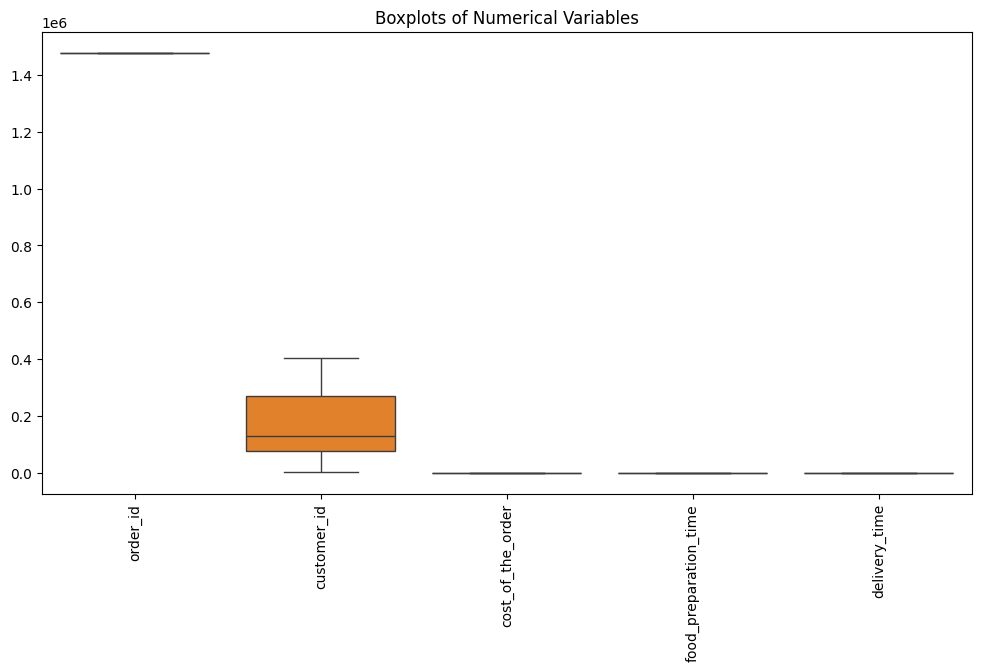

In [14]:
# Boxplots (To Identify Outliers)
plt.figure(figsize=(12, 6)) #figsize used to controle the size of the plot
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplots of Numerical Variables") # used to give name for the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

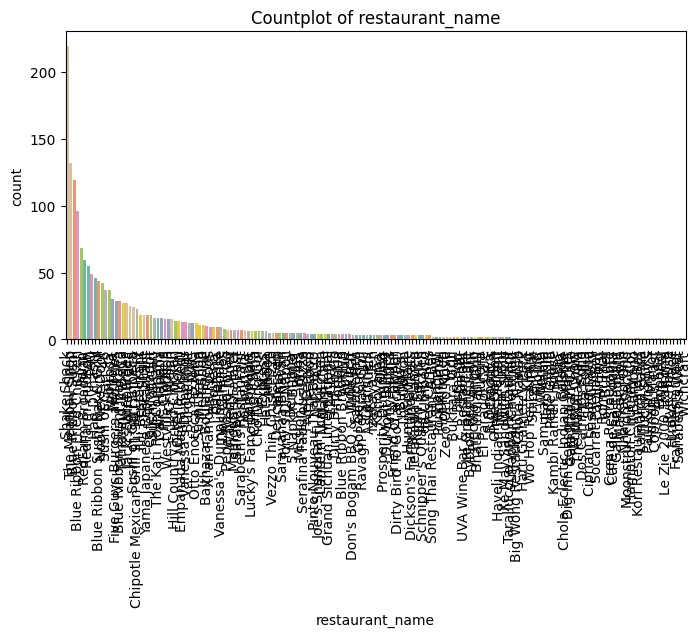

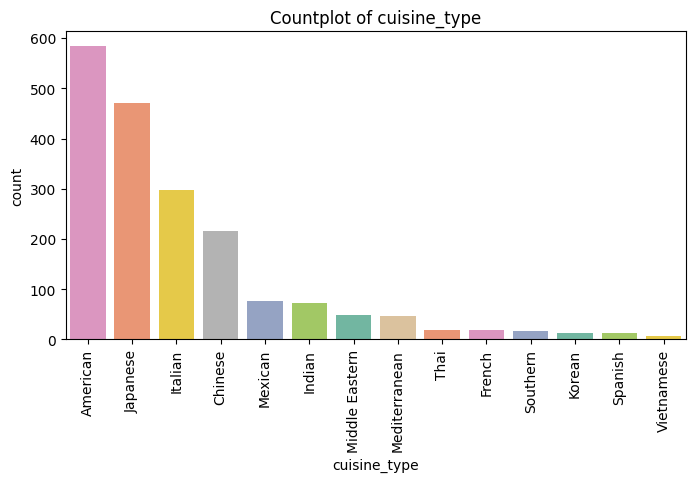

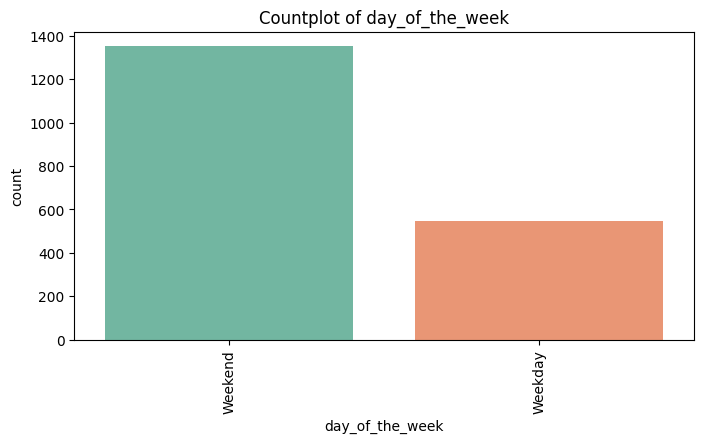

In [41]:
#Countplots (For Frequency of Categorical Data)
categorical_columns = df.select_dtypes(include=['object']).columns  # Identify categorical variables

plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_columns):  # Using the for loop generating plots for each column of categorical_columns
    plt.figure(figsize=(8, 4)) #figsize used to controle the size of the plot
    plt.xticks(rotation=90)
    plt.title(f"Countplot of {col}")
    sns.countplot(x=df[col], hue=df[col],  order=df[col].value_counts().index, palette="Set2");
    plt.show();


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [16]:
top_5_restaurants = df['restaurant_name'].value_counts() # first geting the all restorant name and the data we get it is oreder data using the value_counts() get the count
top_5_restaurants.head() # here selecting top 5 records of the top_5_restaurant list

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations: The top_5_restaurants dataframe contains information about most ordered restaurants and restaurants.head() given the 5 records.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [17]:
#First grouping the cuisine and week coulumn and counting the number of records and selecting first record of the group result
df.groupby(['cuisine_type'])['day_of_the_week'].value_counts()[:1]

,,count
cuisine_type,day_of_the_week,
American,Weekend,415


#### Observations: American is the most popular cuisine on the weekends in the foodhub_order data it achived by using the groupby cuising_type and day_of_the_week column and value_count() get the count of the each weekend by cuisine_type and [:1] will select the top row


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [18]:
# First selected the cost_of_the_order which are more more the 20 then selected the only that rows count and devided that rows * 100 values
num = df[df['cost_of_the_order']>20].shape[0]/df.shape[0]*100
rounded = round(num, 2)
print(rounded)

29.24


#### Observations: 29.24% of the orders cost are more then 20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [19]:
num = df['delivery_time'].mean()
rounded = round(num, 2)
print(rounded)

24.16


#### Observations: 24.16 means of the delivery time around 24.2% of foodhub_order data which is achived by mean() fonction


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [20]:
# using value_counts() function will get the total count of the customer_id coulums and selecting the top 3 records
df['customer_id'].value_counts()[:3]

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations: customer 52832,47440 and 83287 these are the most frequently orded custembers this is achived by using value_counts() fonction and the slicing operation


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


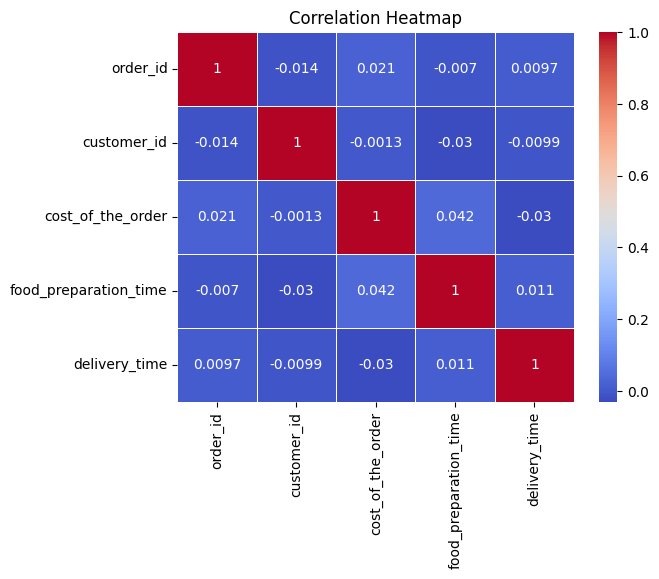

In [21]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
# Check correlation on numeric data only
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

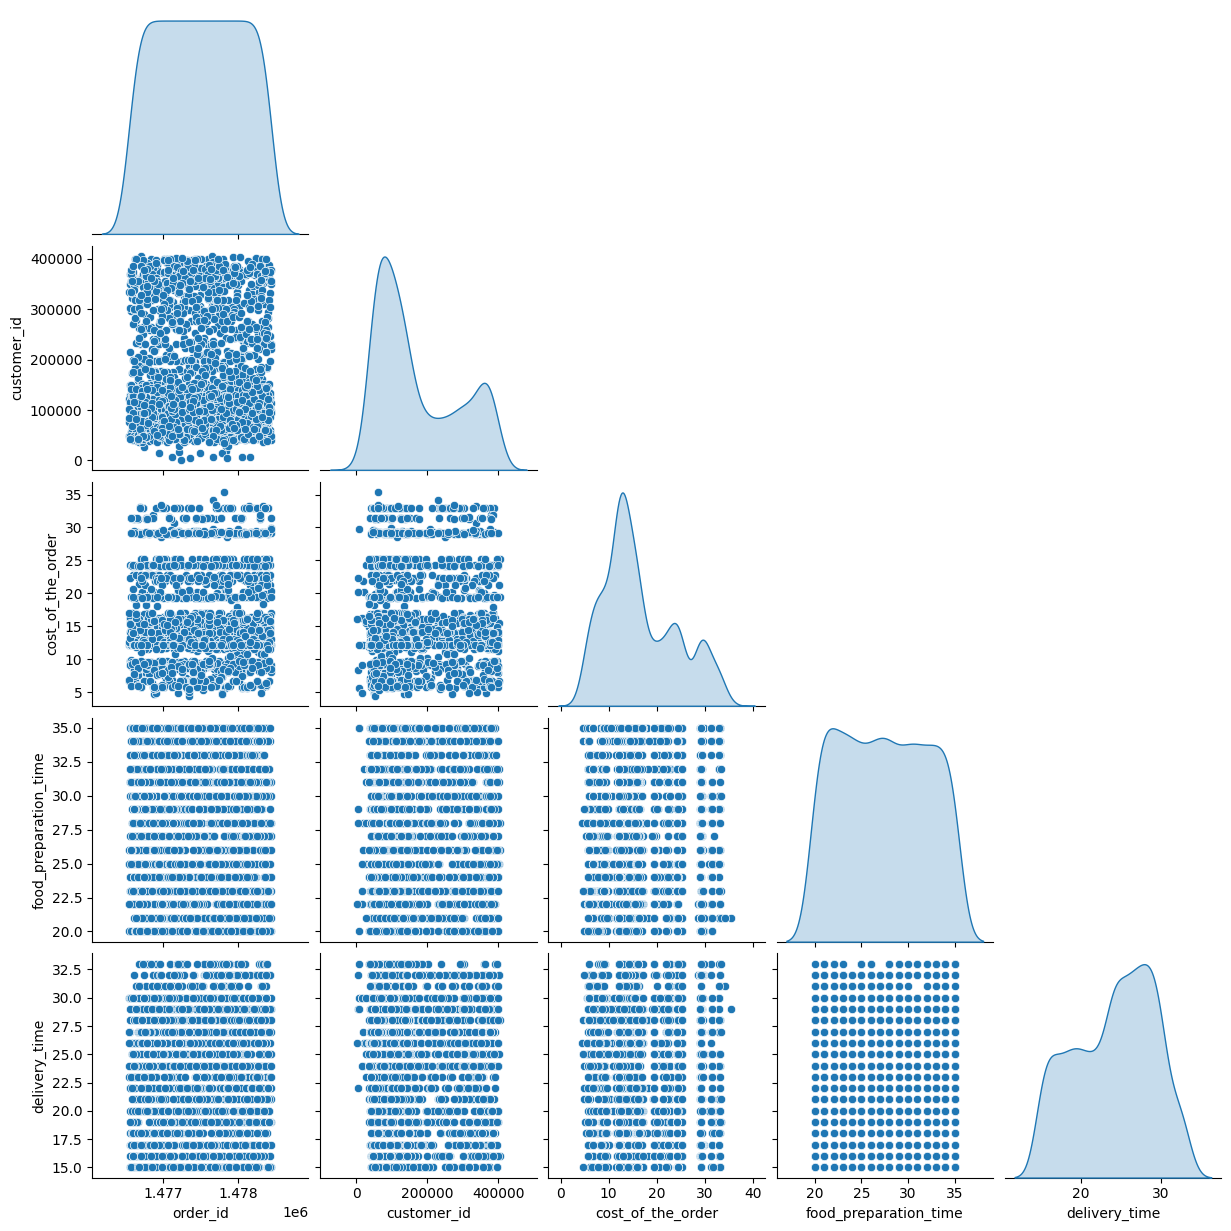

In [22]:
sns.pairplot(df, diag_kind="kde", corner=True)  # corner=True removes duplicate plots
plt.show()

In [44]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for cat_col in categorical_columns:  # Using the for loop generating plots for each column of categorical_columns
    for num_col in numerical_columns: # base on the parent for loop it generating plots for each column of numerical_columns
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[cat_col], y=df[num_col], palette="Set2")
        plt.xticks(rotation=45)
        plt.title(f"Boxplot of {num_col} by {cat_col}")
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [24]:
# Filter restaurants based on rating count of more then 50 and average rating should be greater than 4

# Convert 'rating' column to numeric type
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Grouping by restaurant_name to calculate rating count and average rating
filtered_restaurants = df.groupby('restaurant_name').agg(rating_count=('rating', 'count'), avg_rating=('rating', 'mean')).reset_index()

# Filtering based on the conditions
filtered_restaurants = filtered_restaurants[
    (filtered_restaurants['rating_count'] > 50) &
    (filtered_restaurants['avg_rating'] > 4)
]

print(filtered_restaurants)


               restaurant_name  rating_count  avg_rating
20   Blue Ribbon Fried Chicken            64    4.328125
21           Blue Ribbon Sushi            73    4.219178
136                Shake Shack           133    4.278195
153          The Meatball Shop            84    4.511905


#### Observations: first Convert 'rating' column to numeric type, grouping by restaurant_name to calculate rating count and average rating and filtering based on the conditions and printing the restaurants which are fulfilling the criteria to get the promotional offer

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [25]:
# First fillter the cost_of_the_order which are greter then 20 dolles
# Then calculating the  the 25% from that orders
# Then added cost_of_the_order which are greter then 5 dollers sum as 15%
# That is how get the result of revenue
num = df[df['cost_of_the_order']>20]['cost_of_the_order'].sum()*0.25+df[df['cost_of_the_order']>5]['cost_of_the_order'].sum()*0.15
rounded = round(num, 2) # Converted to 2 digit value
print(rounded)

8379.54


#### Observations: The net revenue generated by the company across all orders by applying charges of 25% and 15% is 8379.54


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [26]:
# Calculate total time for each order
df['Total_Time'] = df['food_preparation_time'] + df['delivery_time']

# Count orders that took more than 60 minutes
orders_above_60 = df[df['Total_Time'] > 60].shape[0]

# Total number of orders
total_orders = df.shape[0]

# Calculate percentage
percentage = (orders_above_60 / total_orders) * 100

print(f"Percentage of orders taking more than 60 minutes: {percentage:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%


#### Observations: first calculate total time for each order then Count orders that took more than 60 minutes then Total number of orders then Calculate percentage then Percentage of orders taking more than 60 minutes: 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [27]:
#used the group by to group the day_of_the_week and delivery_time and calculating the mean
df.groupby(['day_of_the_week'])['delivery_time'].mean()


,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations: It achived by using the groupby and mean function


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Some cuisine types have consistently high ratings (e.g., American,Chinese,French,Indian) while others show mixed feedback.
If certain cuisine types receive lower ratings, it may indicate issues with food quality, service, or expectations.

* Restaurants with more reviews (>50) generally have higher average ratings, indicating that customer engagement positively correlates with trust and reputation.
Some restaurants with fewer reviews still have high ratings, but their lack of visibility might hurt business.

* Some restaurants have low average ratings despite a high number of reviews—this signals potential problems in service, food quality, or pricing.
Negative skewness in ratings for certain cuisines suggests the need for improvement in specific areas.

* Certain cuisines are overrepresented but do not always have high ratings, indicating oversaturation.
Niche cuisines have fewer reviews but higher satisfaction scores, suggesting an opportunity for growth in these segments.

### Recommendations:

*   Invest in marketing and promotions for cuisines that already have high ratings and growing demand (e.g., American,Chinese,French,Indian).
Expand partnerships with high-rated restaurants in these categories to increase market share.

* Identify cuisine types with low ratings and analyze customer feedback to determine the main pain points (e.g., taste, service, portion sizes).
Train restaurant staff, optimize menu items, and consider adjustments in pricing to improve customer satisfaction.

* Restaurants with fewer reviews but high ratings should run incentivized review campaigns (e.g., discounts, loyalty points) to increase visibility.
Promote highly-rated small businesses to boost their reputation and attract more customers.

* Outliers with many negative reviews should be addressed immediately—contact restaurant owners and encourage quality improvements.
Implement feedback-driven improvements, such as better service training, faster delivery times, and menu refinements.

* Promote restaurants with strong ratings and engagement metrics to increase repeat customers.